In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\\Users\\Admin\\Downloads\\scores_data.csv")
print(df)

         Batch  User_ID     Score   
0    AI_ELITE_7  uid_149       6 / 7
1    AI_ELITE_7  uid_148       6 / 7
2    AI_ELITE_7  uid_147       7 / 7
3    AI_ELITE_7  uid_146       7 / 7
4    AI_ELITE_7  uid_145       4 / 7
..          ...      ...         ...
144  AI_ELITE_4    uid_5       4 / 7
145  AI_ELITE_4    uid_4       4 / 7
146  AI_ELITE_4    uid_3       4 / 7
147  AI_ELITE_4    uid_2       3 / 7
148  AI_ELITE_4    uid_1       2 / 7

[149 rows x 3 columns]


In [3]:
df.shape

(149, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [5]:
df.isnull().sum()

Batch          0
User_ID        0
   Score       0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [8]:
df.columns=df.columns.str.strip()
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [9]:
df.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [10]:
print(df['Batch'].unique())
print(df['Score'].unique())

['AI_ELITE_7' 'AI_ELITE_6' 'AI_ELITE_4']
['6 / 7' '7 / 7' '4 / 7' '5 / 7' '3 / 7' '2 / 7' '0 / 7' '1 / 7']


In [11]:
batch_groups=df.groupby('Batch')
print(batch_groups.size())

Batch
AI_ELITE_4    48
AI_ELITE_6    48
AI_ELITE_7    53
dtype: int64


In [12]:
batch=df.groupby('Batch')['Score'].describe()
print(batch)

           count unique    top freq
Batch                              
AI_ELITE_4    48      8  4 / 7   19
AI_ELITE_6    48      8  5 / 7   13
AI_ELITE_7    53      6  6 / 7   13


In [13]:
df['Score']=df['Score'].astype(str)
df['Score']=df['Score'].str.extract(r'(\d+)')
df['Score']=pd.to_numeric(df['Score'],errors='coerce')

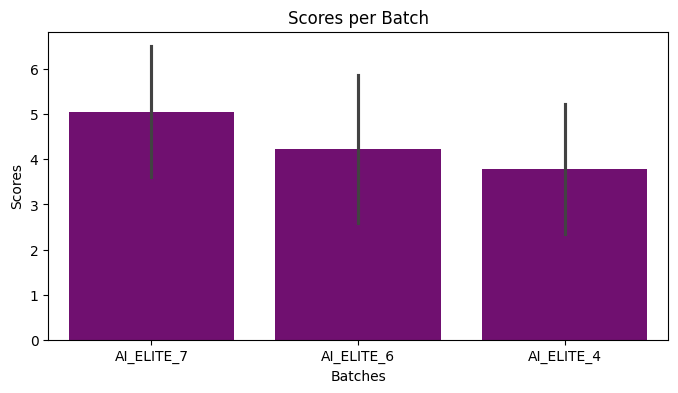

In [34]:
plt.figure(figsize=(8,4))
sns.barplot(x='Batch',y='Score',data=df,errorbar='sd',legend="auto",color="purple")
plt.ylabel("Scores")
plt.xlabel("Batches")
plt.title("Scores per Batch")
plt.show()

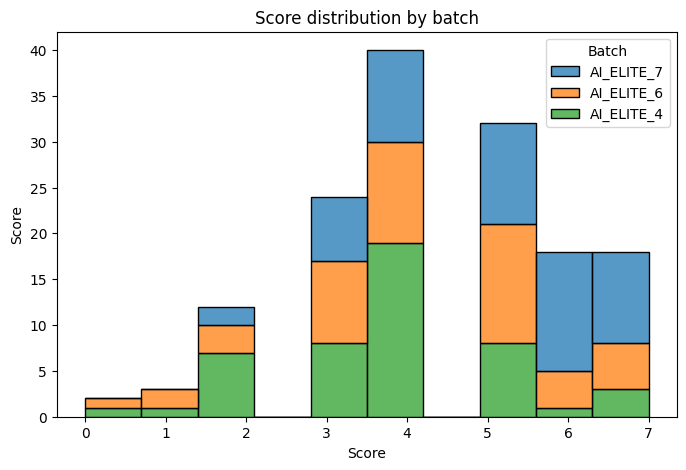

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='Score',hue="Batch",multiple="stack")
plt.ylabel("Score")
plt.title("Score distribution by batch")
plt.show()

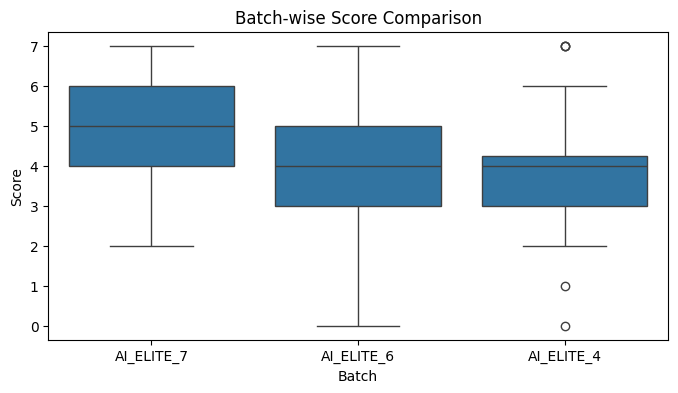

In [35]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Batch', y='Score', data=df)
plt.title("Batch-wise Score Comparison")
plt.show()

Batch
AI_ELITE_7    23
AI_ELITE_6     9
AI_ELITE_4     4
Name: count, dtype: int64


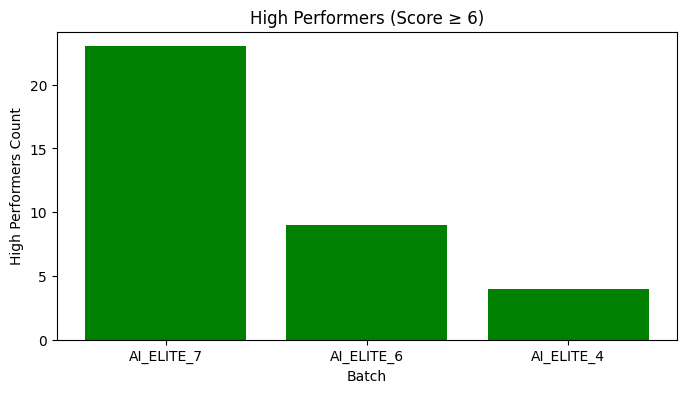

In [36]:
high_perf = df[df['Score'] >= 6]['Batch'].value_counts()
print(high_perf)

plt.figure(figsize=(8,4))
plt.bar(high_perf.index, high_perf.values,color="green")
plt.xlabel("Batch")
plt.ylabel("High Performers Count")
plt.title("High Performers (Score ≥ 6)")
plt.show()

Batch
AI_ELITE_4    9
AI_ELITE_6    6
AI_ELITE_7    2
Name: count, dtype: int64


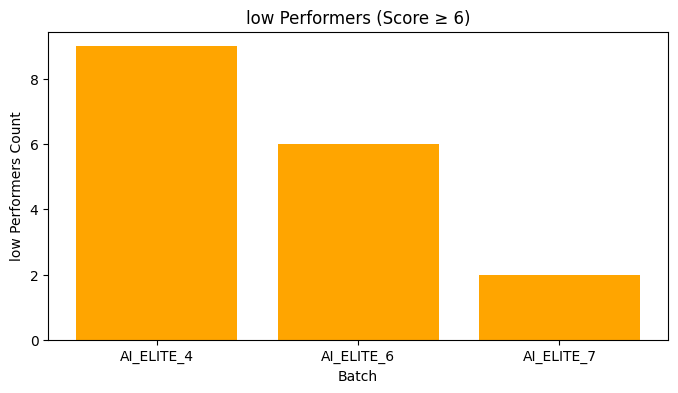

In [37]:
low_perf = df[df['Score'] <= 2]['Batch'].value_counts()
print(low_perf)

plt.figure(figsize=(8,4))
plt.bar(low_perf.index, low_perf.values,color="orange")
plt.xlabel("Batch")
plt.ylabel("low Performers Count")
plt.title("low Performers (Score ≥ 6)")
plt.show()

Batch
AI_ELITE_4    1.443376
AI_ELITE_6    1.640441
AI_ELITE_7    1.446682
Name: Score, dtype: float64


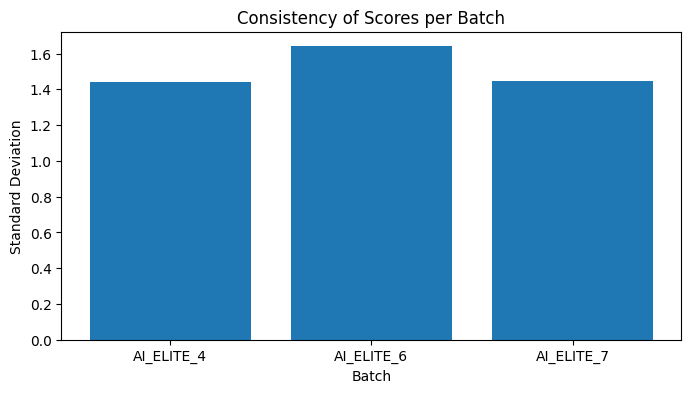

In [38]:
std_scores = df.groupby('Batch')['Score'].std()
print(std_scores)

plt.figure(figsize=(8,4))
plt.bar(std_scores.index, std_scores.values)
plt.xlabel("Batch")
plt.ylabel("Standard Deviation")
plt.title("Consistency of Scores per Batch")
plt.show()